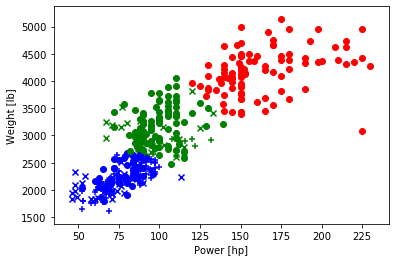

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline  
########################################################################

# load data
cars = pd.read_csv('auto-mpg.data.txt',header=None, sep='\s+')

# extract power and weight as data matrix X
X = cars.iloc[:, [3,4]].values

# extract origin as target value y
y = cars.iloc[:, 7].values

# normalize data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X) # determine min and max
X_normalized = min_max_scaler.transform(X)

# apply k-Means
km = KMeans(n_clusters=3, random_state=0).fit(X_normalized)

# plot cars
# U.S. : o / Europe: x / Japan : +
m = ['o' if o==1 else 'x' if o==2 else '+' for o in y]
# Cluster 1 : red / Cluster 2 : blue / Cluster 3 : green
c = ['red' if l==0 else 'blue' if l==1 else 'green' for l in km.labels_]
for i in range(0,len(X)):
    plt.scatter(X[i,0], X[i,1], color=c[i], marker=m[i])
plt.xlabel('Power [hp]')
plt.ylabel('Weight [lb]')
plt.show()